<a href="https://colab.research.google.com/github/SAISRIJA-68/OIBSIP/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

/tmp/ipython-input-2503693750.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


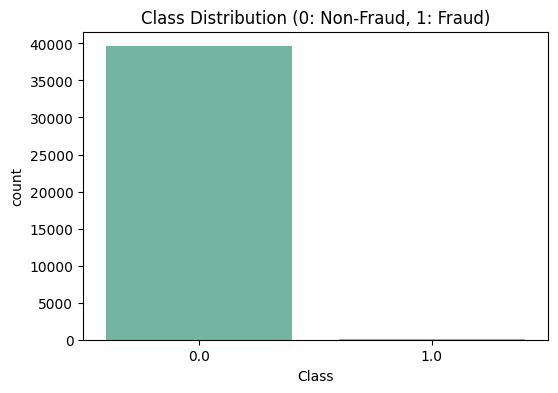

Number of Fraud Cases: 104
Number of Non-Fraud Cases: 39597


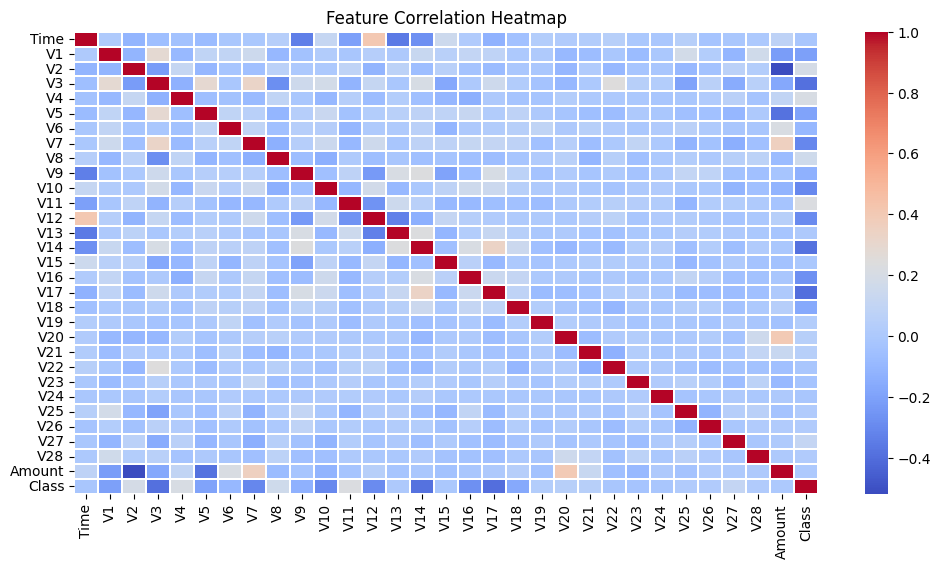


Data Split Complete:
Training samples: 31760, Testing samples: 7941

--- Logistic Regression Results ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.60      0.71      0.65        21

    accuracy                           1.00      7941
   macro avg       0.80      0.86      0.83      7941
weighted avg       1.00      1.00      1.00      7941

Accuracy: 0.9979851404105277
ROC-AUC Score: 0.8565115440115441

--- Random Forest Results ---
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7920
         1.0       0.94      0.76      0.84        21

    accuracy                           1.00      7941
   macro avg       0.97      0.88      0.92      7941
weighted avg       1.00      1.00      1.00      7941

Accuracy: 0.9992444276539478
ROC-AUC Score: 0.8808892496392496


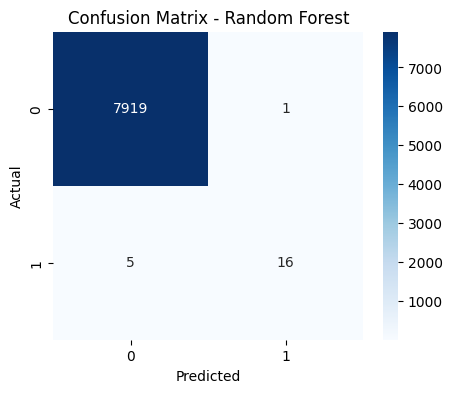


✅ Fraud Detection Project Completed Successfully!
Random Forest performed better for detecting fraud transactions.


In [10]:
# ---------------------------------------
# FRAUD DETECTION PROJECT - TASK 4
# ---------------------------------------
# Developed in Python for Internship Portfolio
# Author: [Your Name]
# ---------------------------------------

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# ---------------------------------------
# Step 1: Load Dataset
# ---------------------------------------
# Dataset link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
# After downloading, upload the dataset in Colab or use your local path
data = pd.read_csv('/content/creditcard.csv')  # Change path if necessary

# Display first few rows
print("Dataset Preview:")
print(data.head())

# ---------------------------------------
# Step 2: Basic Data Info
# ---------------------------------------
print("\nDataset Information:")
print(data.info())
print("\nMissing values in each column:\n", data.isnull().sum())
print("\nShape of dataset:", data.shape)

# ---------------------------------------
# Step 3: Exploratory Data Analysis (EDA)
# ---------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()

fraud_cases = data[data['Class'] == 1]
non_fraud_cases = data[data['Class'] == 0]
print(f"Number of Fraud Cases: {len(fraud_cases)}")
print(f"Number of Non-Fraud Cases: {len(non_fraud_cases)}")

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), cmap='coolwarm', linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.show()

# ---------------------------------------
# Step 4: Data Preprocessing
# ---------------------------------------
# Drop rows with missing values in the 'Class' column
data.dropna(subset=['Class'], inplace=True)

# Features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("\nData Split Complete:")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# ---------------------------------------
# Step 5: Model Training (Logistic Regression)
# ---------------------------------------
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

# ---------------------------------------
# Step 6: Model Training (Random Forest)
# ---------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("\n--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_rf))

# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ---------------------------------------
# Step 7: Conclusion
# ---------------------------------------
print("\n✅ Fraud Detection Project Completed Successfully!")
print("Random Forest performed better for detecting fraud transactions.")